In [263]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce
import math
path = 'C:\\Users\\kafed\\Downloads\\20240616015338R_pjinkim\\'
path2 = 'C:\\Users\\kafed\\Downloads\\20240616020404R_pjinkim\\'
path3 = 'C:\\Users\\kafed\\Downloads\\20240616032428R_pjinkim\\'
path4 = 'C:\\Users\\kafed\\Downloads\\20240616043858R_pjinkim\\'
path5='C:\\Users\\kafed\\Downloads\\20240616045944R_pjinkim\\'

In [220]:
os.listdir(path)

['acce.txt',
 'acce_bias.txt',
 'acce_uncalib.txt',
 'battery.txt',
 'game_rv.txt',
 'gravity.txt',
 'gyro.txt',
 'gyro_bias.txt',
 'gyro_uncalib.txt',
 'linacce.txt',
 'magnet.txt',
 'magnetic_rv.txt',
 'magnet_bias.txt',
 'magnet_uncalib.txt',
 'pressure.txt',
 'rv.txt',
 'step.txt']

In [221]:
def data_merge(path, files):
    data_imu = []
    for file in files:
        data = pd.read_csv(os.path.join(path,file), sep=" ")
        data = data.iloc[:,0:4]
        name = file.split('.')[0]
        data.columns = ['t', name+'_x', name+'_y', name+'_z']
        data_imu.append(data)
    df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['t'], how='outer'), data_imu)
    df_merged = df_merged.sort_values('t').reset_index(drop=True).interpolate()
    return df_merged

In [222]:
data.sort_values('t')

,t,acce_x,acce_y,acce_z
0,2344202649774177,0.146051,0.780534,9.282603
1,2344202669771743,0.150839,0.730254,9.522031
2,2344202689769176,0.167599,0.881093,9.682447
3,2344202709766609,0.141262,0.921796,9.562734
4,2344202729764109,0.378295,1.103761,9.615408
...,...,...,...,...
1013,2344222907362245,1.276148,0.050280,9.296969
1014,2344222927360045,1.134886,0.026337,9.311335
1015,2344222947357911,1.158829,0.232245,9.160496
1016,2344222967355777,1.019961,0.186753,9.143736


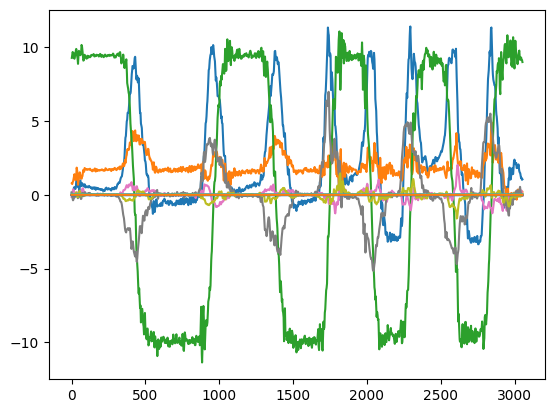

In [55]:
data = data_merge(path, ['acce.txt','acce_bias.txt','gyro.txt','gyro_bias.txt'])
data = data.sort_values('t').reset_index(drop=True).interpolate()
plt.plot(data[data.columns[1:]])

<Axes: >

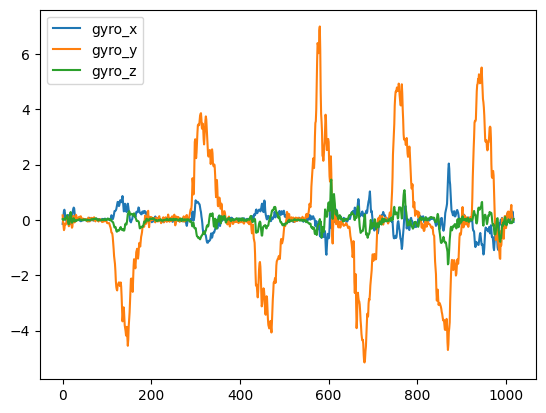

In [124]:
data = data_merge(path, ['gyro.txt'])
data[data.columns[1:]].plot()

<Axes: >

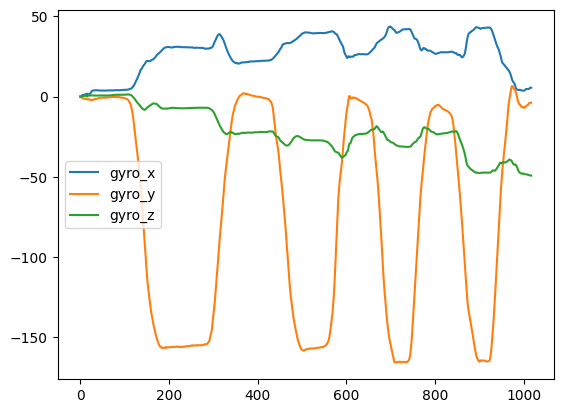

In [125]:
data[data.columns[1:]].cumsum().plot()

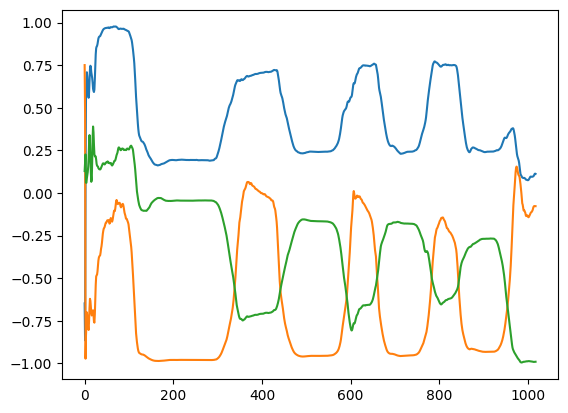

In [131]:
data_w = data[data.columns[1:]].cumsum()
w = np.sqrt(data_w['gyro_x']**2+data_w['gyro_y']**2+data_w['gyro_z']**2)
xg = data_w['gyro_x']/w
yg = data_w['gyro_y']/w
zg = data_w['gyro_z']/w
plt.plot(xg)
plt.plot(yg)
plt.plot(zg)

C:\Users\kafed\AppData\Local\Programs\Python\Python310\lib\site-packages\PSpincalc\PSpincalc.py:472: RuntimeWarning: invalid value encountered in sqrt
  EA = np.c_[np.arctan2((2*(Q[:,1]*Q[:,2] + Q[:,0]*Q[:,3])),(np.power(Q[:,0],2) + np.power(Q[:,1],2) - np.power(Q[:,2],2) - np.power(Q[:,3],2))), np.arctan2(-(2*(Q[:,1]*Q[:,3] - Q[:,0]*Q[:,2])),np.sqrt(1-np.power(2*(Q[:,1]*Q[:,3] - Q[:,0]*Q[:,2]),2))),np.arctan2((2*(Q[:,2]*Q[:,3] + Q[:,0]*Q[:,1])),(np.power(Q[:,0],2) - np.power(Q[:,1],2) - np.power(Q[:,2],2) + np.power(Q[:,3],2)))]


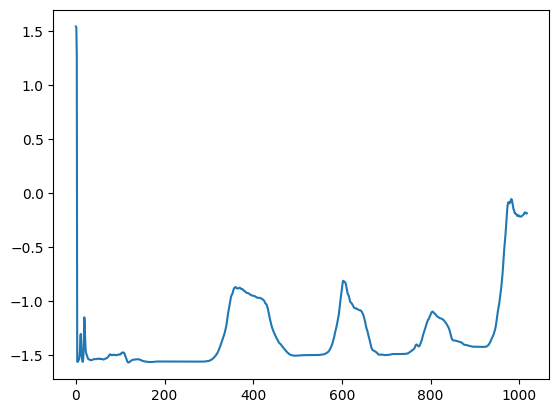

In [254]:
data = data_merge(path, ['gyro.txt'])
import PSpincalc as sp
angle = []
data_w = data[data.columns[1:]].cumsum()
w = np.sqrt(data_w['gyro_x']**2+data_w['gyro_y']**2+data_w['gyro_z']**2)
xg = data_w['gyro_x']/w
yg = data_w['gyro_y']/w
zg = data_w['gyro_z']/w
for i in range(len(data_w)):
    quaternion = [w.iloc[i],data_w['gyro_x'].iloc[i], data_w['gyro_y'].iloc[i], data_w['gyro_z'].iloc[i]]
    #quaternion = [1,data_w['gyro_x'].iloc[i]/2, data_w['gyro_y'].iloc[i]/2, data_w['gyro_z'].iloc[i]/2]
    #quaternion = [np.cos(w.iloc[i]/2), zg.iloc[i]*np.sin(data_w['gyro_x'].iloc[i]/2), yg.iloc[i]*np.sin(data_w['gyro_y'].iloc[i]/2), xg.iloc[i]*np.sin(data_w['gyro_z'].iloc[i]/2)]
    ea = sp.Q2EA(quaternion, EulerOrder="zyx", ignoreAllChk=True)[0]
    ang = (-ea[2])# / (2 * 3.14) * 360)
    #if ang<-150:
     #   ang=180
    angle.append(ang)
plt.plot(angle)
data_w = data[data.columns[1:]].cumsum()
w = np.sqrt(data_w['gyro_x']**2+data_w['gyro_y']**2+data_w['gyro_z']**2)
#plt.plot(w)

C:\Users\kafed\AppData\Local\Programs\Python\Python310\lib\site-packages\PSpincalc\PSpincalc.py:482: RuntimeWarning: invalid value encountered in sqrt
  EA = np.c_[np.arctan2(-(2*(Q[:,2]*Q[:,3] - Q[:,0]*Q[:,1])),(np.power(Q[:,0],2) - np.power(Q[:,1],2) - np.power(Q[:,2],2) + np.power(Q[:,3],2))), np.arctan2((2*(Q[:,1]*Q[:,3] + Q[:,0]*Q[:,2])),np.sqrt(1-np.power(2*(Q[:,1]*Q[:,3] + Q[:,0]*Q[:,2]),2))),np.arctan2(-(2*(Q[:,1]*Q[:,2] - Q[:,0]*Q[:,3])),(np.power(Q[:,0],2) + np.power(Q[:,1],2) - np.power(Q[:,2],2) - np.power(Q[:,3],2)))]


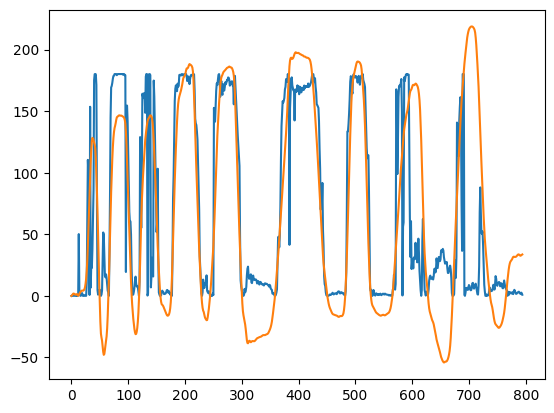

In [269]:
data = data_merge(path5, ['acce.txt'])
import PSpincalc as sp
angle = []
AccXangle=[]
AccYangle=[]
AccZangle=[]
data_w = data[data.columns[1:]]#.cumsum()
w = np.sqrt(data_w['acce_x']**2+data_w['acce_y']**2+data_w['acce_z']**2)
xg = data_w['acce_x']/w
yg = data_w['acce_y']/w
zg = data_w['acce_z']/w
for i in range(len(data_w)):
    
    quaternion = [w.iloc[i],data_w['acce_x'].iloc[i], data_w['acce_y'].iloc[i], data_w['acce_z'].iloc[i]]
    #quaternion = [np.cos(w.iloc[i]/2), xg.iloc[i]*np.sin(data_w['acce_x'].iloc[i]/2), yg.iloc[i]*np.sin(data_w['acce_y'].iloc[i]/2), zg.iloc[i]*np.sin(data_w['acce_z'].iloc[i]/2)]
    ea = sp.Q2EA(quaternion, EulerOrder="xyz", ignoreAllChk=True)[0]
    ang = (-ea[2] / (2*3.14) * 360)
    #if ang<-150:
     #   ang=180
    #ang = (ea[2] +M_PI)*RAD_TO_DEG/2
    angle.append(ang)

    '''
    AccXangle.append((math.atan2(data['acce_y'].iloc[i],data['acce_z'].iloc[i])+M_PI)*RAD_TO_DEG)
    AccYangle.append((math.atan2(data['acce_z'].iloc[i],data['acce_x'].iloc[i])+M_PI)*RAD_TO_DEG)
    AccZangle.append((math.atan2(data['acce_x'].iloc[i],data['acce_y'].iloc[i])+M_PI)*RAD_TO_DEG)
    '''
    AccXangle.append((math.atan2(data['acce_y'].iloc[i],data['acce_z'].iloc[i])+M_PI)*RAD_TO_DEG)
    AccYangle.append((math.atan2(data['acce_z'].iloc[i],data['acce_x'].iloc[i])+M_PI)*RAD_TO_DEG)
    AccZangle.append((math.atan2(data['acce_x'].iloc[i],data['acce_y'].iloc[i])+M_PI)*RAD_TO_DEG)
    
plt.plot(angle - np.min(angle))
data_w = data[data.columns[1:]]
#w = np.sqrt(data_w['acce_x']**2+data_w['acce_y']**2+data_w['acce_z']**2)
#plt.plot(w)
#plt.plot(AccYangle - np.min(AccYangle) , label = 'y')
data = data_merge(path5, ['gyro.txt'])
plt.plot((-data['gyro_y'].cumsum())*1.2)
#plt.plot(np.sqrt(data['gyro_x'].cumsum()**2+data['gyro_y'].cumsum()**2+data['gyro_z'].cumsum()**2))

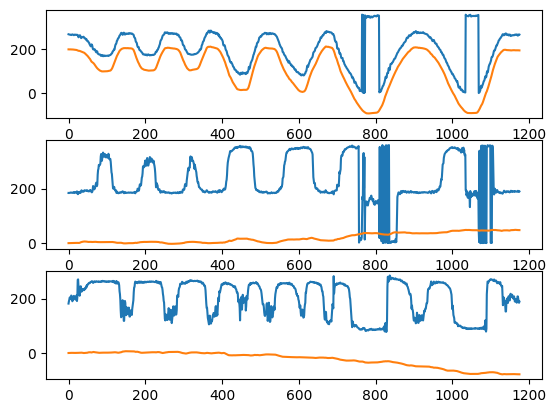

<Figure size 1600x800 with 0 Axes>

In [242]:
M_PI = 3.14159265358979323846
RAD_TO_DEG = 57.29578
data = data_merge(path4, ['acce.txt'])
AccXangle=[]
AccYangle=[]
AccZangle=[]
for i in range(len(data)):
    '''
    AccXangle.append((math.atan2(data['acce_y'].iloc[i],data['acce_z'].iloc[i])+M_PI)*RAD_TO_DEG)
    AccYangle.append((math.atan2(data['acce_z'].iloc[i],data['acce_x'].iloc[i])+M_PI)*RAD_TO_DEG)
    AccZangle.append((math.atan2(data['acce_x'].iloc[i],data['acce_y'].iloc[i])+M_PI)*RAD_TO_DEG)
    '''
    AccXangle.append((math.atan2(data['acce_y'].iloc[i],data['acce_z'].iloc[i])+M_PI)*RAD_TO_DEG)
    AccYangle.append((math.atan2(data['acce_z'].iloc[i],data['acce_x'].iloc[i])+M_PI)*RAD_TO_DEG)
    AccZangle.append((math.atan2(data['acce_x'].iloc[i],data['acce_y'].iloc[i])+M_PI)*RAD_TO_DEG)

data = data_merge(path4, ['gyro.txt'])

from matplotlib.pyplot import figure
fig, axs = plt.subplots(3)
figure(figsize=(20, 10), dpi=80)
#plt.plot(AccXangle - np.min(AccXangle), label = 'x')
axs[0].plot(AccYangle - np.min(AccYangle), label = 'y')
#plt.plot(AccZangle - np.min(AccZangle), label = 'z')
axs[0].plot((data['gyro_y'].cumsum())*1.2+200)

axs[1].plot(AccXangle, label = 'x')
axs[1].plot(data['gyro_x'].cumsum())

axs[2].plot(AccZangle, label = 'z')
axs[2].plot(data['gyro_z'].cumsum())

In [ ]:
#https://ozzmaker.com/berryimu/